# Clustering Algorithm In Machine Learning

### <span id="1"></span>  1. What is Clustering?

#### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-07-15-19-27.png" class="center">


### <span id="2"></span>  2. What is K-Means Algorithm?

K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into clusters.

In simple words:

    K-Means divides data into K groups so that points in the same group are more similar to each other than to points in other groups.

### <span id="3"></span>  3. How does the K-Means Algorithm Work?



Step-1: Choose number of clusters K

Step-2: Pick K random points (centroids)

Step-3: Assign each data point to nearest centroid

Step-4: Update centroids

Step-5: Repeat until centroids stop changing

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('../Datasets/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
df.rename(columns={'Genre':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace=True)

In [24]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [17]:
df.shape

(200, 5)

#### Checking Null Value

In [18]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [25]:
df = df.drop('CustomerID', axis = 1)

In [26]:
df

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


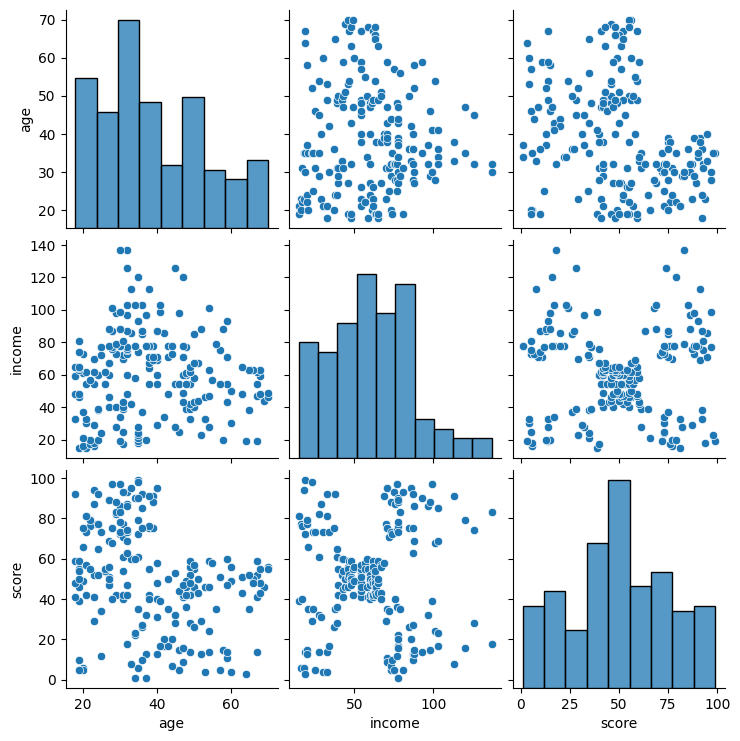

In [27]:
sns.pairplot(df)

In [31]:
df[['age','income','score']]

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


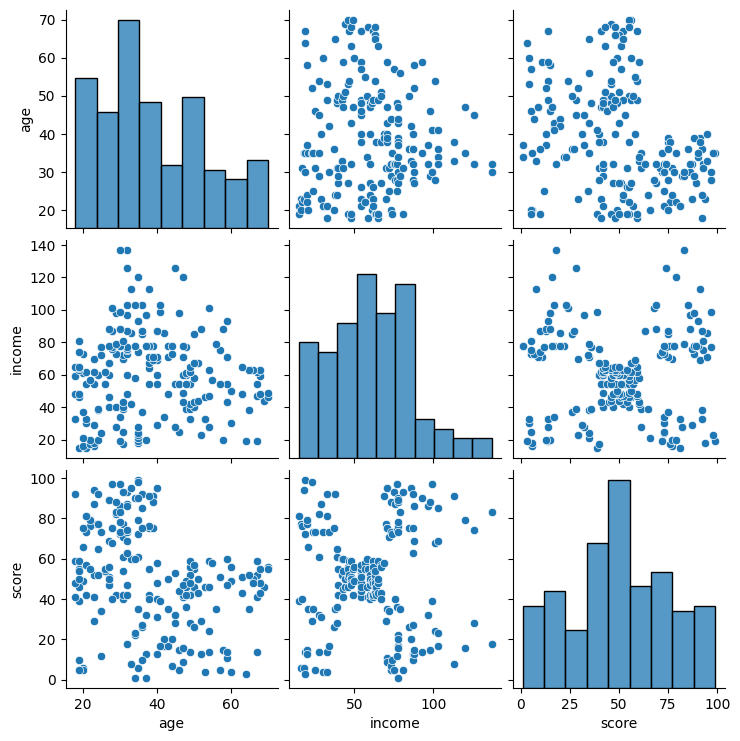

In [28]:
sns.pairplot(df[['age','income','score']])

In [14]:
x = df.drop(['score','gender'], axis = 1)
x

,age,income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


In [15]:
y = df['score']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: score, Length: 200, dtype: int64

In [16]:
import sklearn.cluster as cluster

In [17]:
kmeans = cluster.KMeans(n_clusters = 5) # k = 5

In [18]:
kmeans = kmeans.fit(df[['income','score']])

In [19]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [20]:
df['clusters'] = kmeans.labels_

In [21]:
df['clusters']

0      0
1      4
2      0
3      4
4      0
      ..
195    2
196    3
197    2
198    3
199    2
Name: clusters, Length: 200, dtype: int32

In [22]:
df.head(15)

,gender,age,income,score,clusters
0,Male,19,15,39,0
1,Male,21,15,81,4
2,Female,20,16,6,0
3,Female,23,16,77,4
4,Female,31,17,40,0
5,Female,22,17,76,4
6,Female,35,18,6,0
7,Female,23,18,94,4
8,Male,64,19,3,0
9,Female,30,19,72,4


In [23]:
df['clusters'].value_counts()

1    81
2    39
3    35
0    23
4    22
Name: clusters, dtype: int64

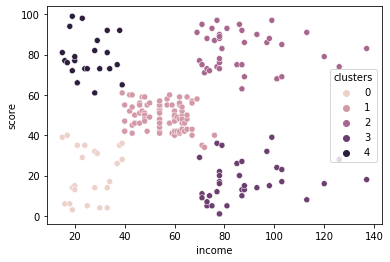

In [24]:
seaborn.scatterplot(x ='income', y='score', hue='clusters', data=df)

In [25]:
from sklearn.cluster import KMeans

In [26]:
K_range = range(1,15)
wcss = []

In [27]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)  #Inertia_ is the sum of squared error for each cluster.

In [28]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30227.60651315203,
 25004.460034268588,
 21850.16528258562,
 19634.554629349972,
 17615.645251508533,
 16013.607384678813,
 14313.163796334384,
 12797.675817809639]

Text(0.5, 1.0, 'Tennis Elbow Courve')

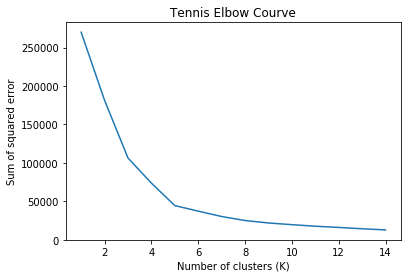

In [29]:
plt.xlabel('Number of clusters (K)') 
plt.ylabel('Sum of squared error') 
plt.plot(K_range,wcss) 
plt.title('Tennis Elbow Courve') 

In [30]:
K_range = range(1,20)
wcss2 = []

In [31]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss2.append(km.inertia_) #Inertia_ is the sum of squared error for each cluster.

In [32]:
wcss2

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23900.961527828902,
 19502.407839362197,
 15578.191886608018,
 13012.800984809697,
 11510.8384658681,
 10207.661348822032,
 9320.788340008805,
 8670.94744914528,
 7906.813551747346,
 7297.317976536712,
 6824.541480755674,
 6004.772952743851,
 5949.191458283719,
 5225.606796308265,
 5022.898489010988]

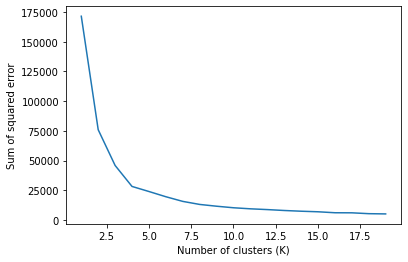

In [33]:
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(K_range,wcss2)

In [34]:
kmeans2 = cluster.KMeans(n_clusters = 4)

In [35]:
kmeans2 = kmeans2.fit(df[['age','score']])

In [36]:
kmeans2.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

In [37]:
df['age_clusters'] = kmeans2.labels_

In [38]:
df['age_clusters'].value_counts()

1    57
3    48
2    48
0    47
Name: age_clusters, dtype: int64

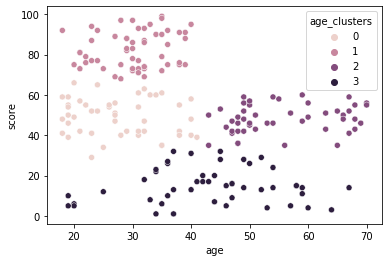

In [39]:
seaborn.scatterplot(x='age', y='score',hue='age_clusters',data=df)